## Avacado Project

### Problem Statement: Predict the Avocado's Average Price based on different features.

Let's begin with importing the important library for reading and visualizing the data

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Updating the url link for the data and putting it in a Panda Dataframe.

In [70]:
url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv'
df=pd.read_csv(url)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. There are 16468 rows and 14 columns
2. One look and we can see that there are many null values present. We have to check it.
3. There is an Unnamed: 0 column which we will have to remove
4. 4046, 4225 and 4770 are Product look up code as per the description given. We will then rename them as PL1, PL2 and PL3

Lets rename the column. 1st we will copy the columns and then drop the original

In [71]:
df['PL1']=df['4046']

In [72]:
df['PL2']=df['4225']
df['PL3']=df['4770']

In [73]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PL1,PL2,PL3
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,1036.74,54454.85,48.16
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,674.28,44638.81,58.33
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,794.70,109149.67,130.50
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,1132.00,71976.41,72.58
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,941.48,43838.39,75.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The columns are copied now lets drop the original

In [74]:
df.drop(['Unnamed: 0','4046','4225','4770'],axis=1,inplace=True)

In [75]:
df

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PL1,PL2,PL3
0,27-12-2015,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,1036.74,54454.85,48.16
1,20-12-2015,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,674.28,44638.81,58.33
2,13-12-2015,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,794.70,109149.67,130.50
3,06-12-2015,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,1132.00,71976.41,72.58
4,29-11-2015,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,941.48,43838.39,75.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Done. The Unnamed columns is dropped.

Now we will check for NaN values.

In [76]:
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
PL1             14951
PL2             14951
PL3             14951
dtype: int64

The null value is exact the same for each column and the data is huge. 91% of the data is null hence we will not fill it and we will drop the null values from the dataset

In [77]:
df.dropna(how = 'all',inplace=True)

In [78]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
PL1             0
PL2             0
PL3             0
dtype: int64

The above command has drop the null values from the complete dataset.
Lets check the shape now of our data.

In [79]:
df.shape

(1517, 13)

So no we are left with 1517 rows and 13 columns.

Let's study more about the data

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   Total Bags    1517 non-null   float64
 4   Small Bags    1517 non-null   float64
 5   Large Bags    1517 non-null   float64
 6   XLarge Bags   1517 non-null   float64
 7   type          1517 non-null   object 
 8   year          1517 non-null   float64
 9   region        1517 non-null   object 
 10  PL1           1517 non-null   float64
 11  PL2           1517 non-null   float64
 12  PL3           1517 non-null   float64
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


We have 3 object columns out of which one is date and remaining are numerical.

In [81]:
df.describe()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,PL1,PL2,PL3
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03
mean,1.074990,1.601879e+06,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.464387e+05,6.114375e+05,5.040550e+04
std,0.188891,4.433143e+06,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,1.947614e+06,1.672906e+06,1.377812e+05
min,0.490000,3.875074e+04,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,4.677200e+02,1.783770e+03,0.000000e+00
25%,0.980000,1.474700e+05,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,2.040034e+04,4.147606e+04,9.112500e+02
50%,1.080000,4.027919e+05,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,8.175117e+04,1.186649e+05,7.688170e+03
75%,1.190000,9.819751e+05,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,3.775785e+05,4.851503e+05,2.916730e+04
max,1.680000,4.465546e+07,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,1.893304e+07,1.895648e+07,1.381516e+06


Because of the float data we are not getting the correct pciture of the statstical summary.

We will need to check this after removing the error

In [82]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,PL1,PL2,PL3
count,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000,1517.00000
mean,1.07499,1601879.06784,293597.41574,248773.59529,42642.04937,2181.77107,2015.16282,646438.65411,611437.50259,50405.49540
std,0.18889,4433142.82075,757976.53132,647476.52050,118215.68184,7455.71214,0.36932,1947613.56974,1672906.16466,137781.24924
min,0.49000,38750.74000,3311.77000,3311.77000,0.00000,0.00000,2015.00000,467.72000,1783.77000,0.00000
25%,0.98000,147469.99000,36206.89000,29727.22000,540.74000,0.00000,2015.00000,20400.34000,41476.06000,911.25000
50%,1.08000,402791.86000,73979.06000,62375.69000,5044.35000,0.00000,2015.00000,81751.17000,118664.89000,7688.17000
75%,1.19000,981975.08000,157609.68000,146199.35000,29267.67000,401.48000,2015.00000,377578.48000,485150.34000,29167.30000
max,1.68000,44655461.51000,6736304.04000,5893641.72000,1121076.47000,108072.79000,2016.00000,18933038.04000,18956479.74000,1381516.11000


Now we can understand the data.

As per above observation:
1. Mean is higher than median. Hence skewness is present and it is right skewed.
2. Standard deviation is very high is some of the columns and even big difference in 75 percentile and Max, indicating the presence of outliers.
3. Min of 0 in XLarge bags, we will have to check it and if require rectify it.

In [83]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

There is only type of Avacado that is conventional type

In [84]:
df['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

We have data only for 2 years 2015 and 2016

In [85]:
df.Date = df.Date.apply(pd.to_datetime)
df['Month'] = df['Date'].apply(lambda x:x.month)
df.drop('Date',axis=1,inplace=True)
df.Month = df.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [86]:
df

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,PL1,PL2,PL3,Month
0,1.33,64236.62,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany,1036.74,54454.85,48.16,DEC
1,1.35,54876.98,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany,674.28,44638.81,58.33,DEC
2,0.93,118220.22,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany,794.70,109149.67,130.50,DEC
3,1.08,78992.15,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany,1132.00,71976.41,72.58,JUNE
4,1.28,51039.60,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany,941.48,43838.39,75.78,NOV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,57529.11,56366.66,17531.78,OCT
1513,1.51,178235.75,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,43325.87,52189.61,19419.57,SEPT
1514,1.48,178410.82,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,46364.75,52893.38,16736.92,FEB
1515,1.47,189131.52,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,54110.79,53593.58,17495.42,SEPT


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

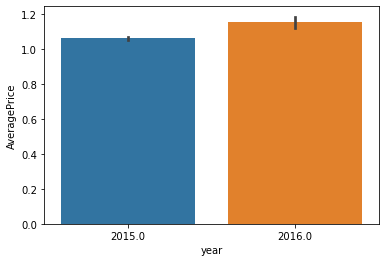

In [87]:
sns.barplot(x='year',y='AveragePrice',data=df)

Prices were higher in 2016 as compared to 2015

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

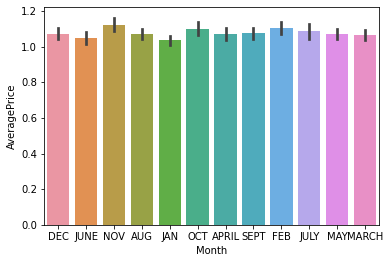

In [88]:
sns.barplot(x='Month',y='AveragePrice',data=df)

Average price remains same almost throughout a year

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

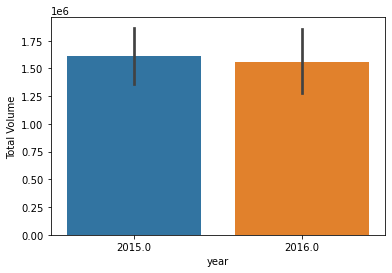

In [89]:
sns.barplot(x='year',y='Total Volume',data=df)

Volume is same in both the year

<AxesSubplot:xlabel='Month', ylabel='Total Volume'>

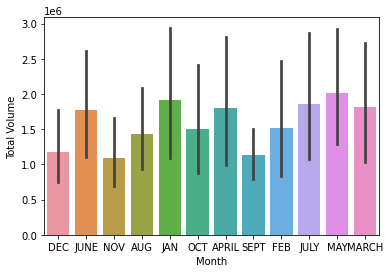

In [90]:
sns.barplot(x='Month',y='Total Volume',data=df)

Volume is high in Jan, April, May and Jul. Low Sep, Nov and Dec has low volume of sale

<AxesSubplot:xlabel='Month,year'>

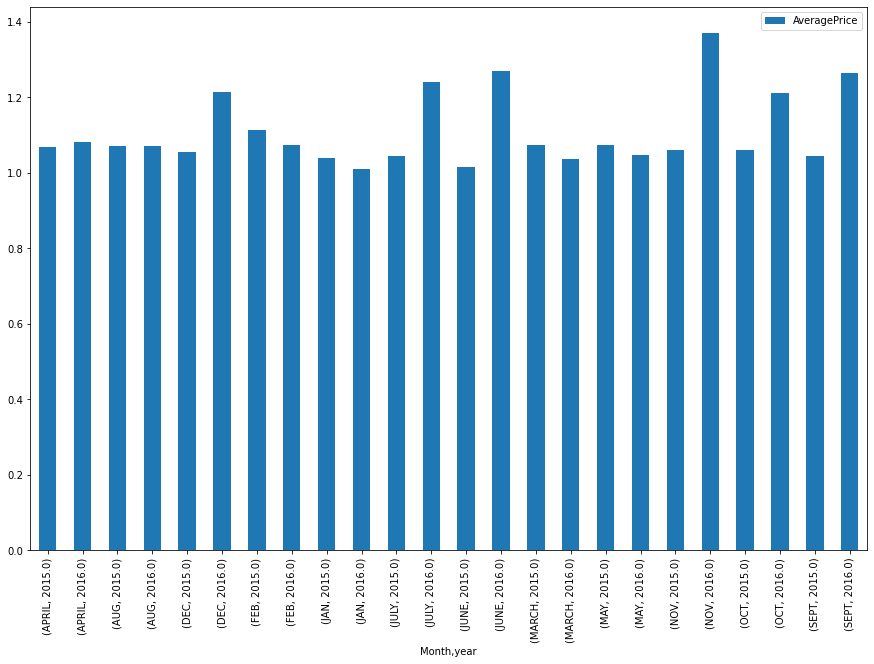

In [91]:
df.groupby(['Month','year']).agg({'AveragePrice':np.mean}).plot.bar(figsize=(15, 10))

Price was highest in Nov 2016 and least in Jan2016

<AxesSubplot:xlabel='year', ylabel='PL1'>

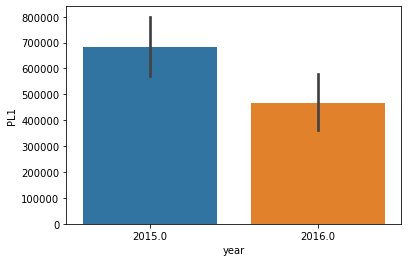

In [92]:
sns.barplot(y='PL1',x='year',data=df)

Product label 1 has declined from 2015

<AxesSubplot:xlabel='year', ylabel='PL2'>

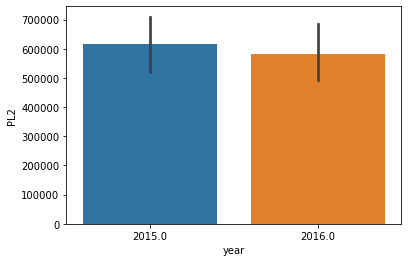

In [93]:
sns.barplot(y='PL2',x='year',data=df)

Slight drop in PL2 demand can also be seen

<AxesSubplot:xlabel='year', ylabel='PL3'>

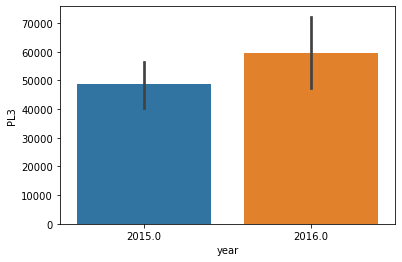

In [94]:
sns.barplot(y='PL3',x='year',data=df)

Sigificant rise in PL3 in 2016

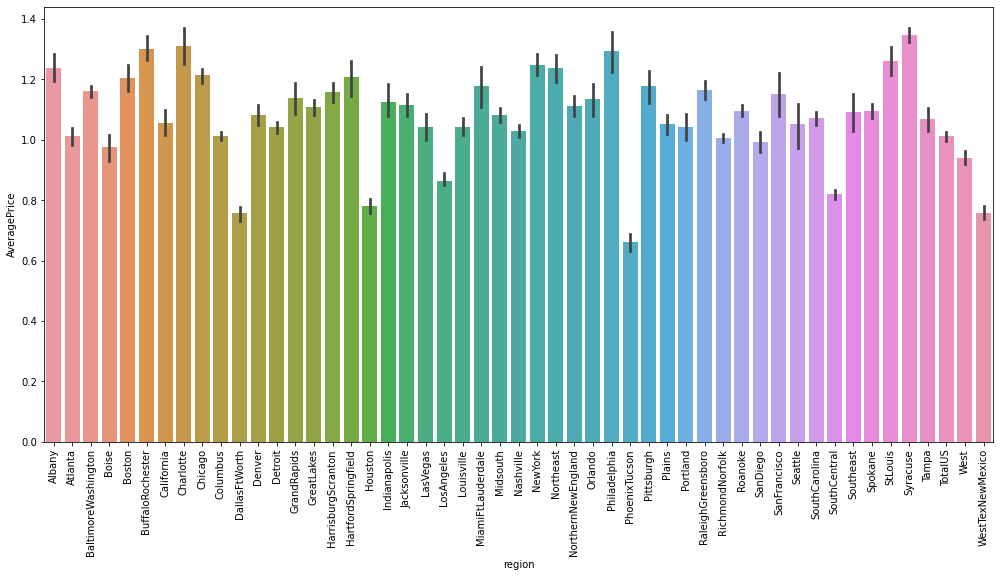

In [95]:
plt.figure(figsize=(17,8))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.show()

Average Price is higher is Syracuse followed by Albany, Philadelphia, Charlotte and BuffaloRocsheter. Average price is very low in PhoenixTucson

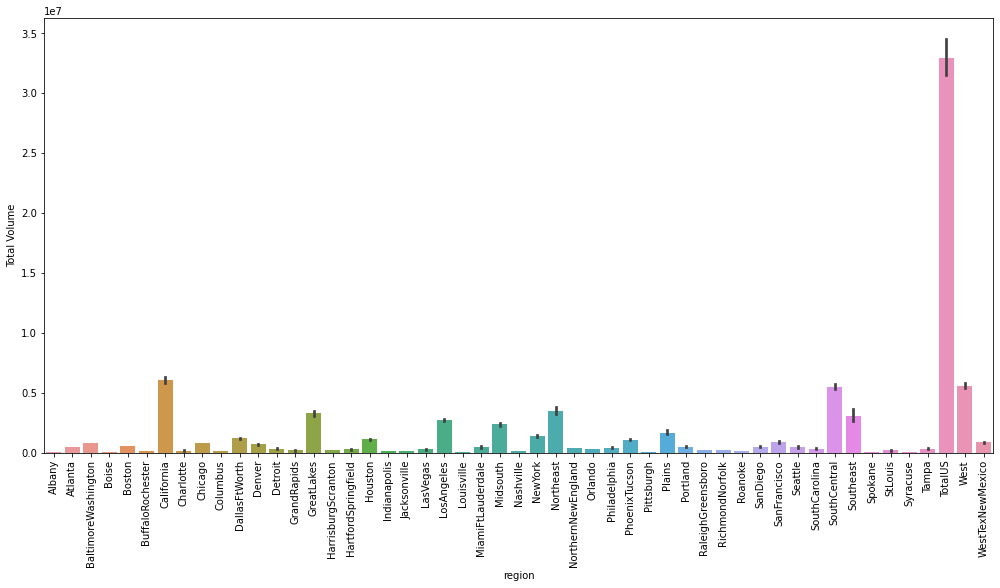

In [96]:
plt.figure(figsize=(17,8))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)
plt.show()

Volume is very low in Syracuse explaining the reason of high price. California produces the high volume of Avocado.

<AxesSubplot:xlabel='region,year'>

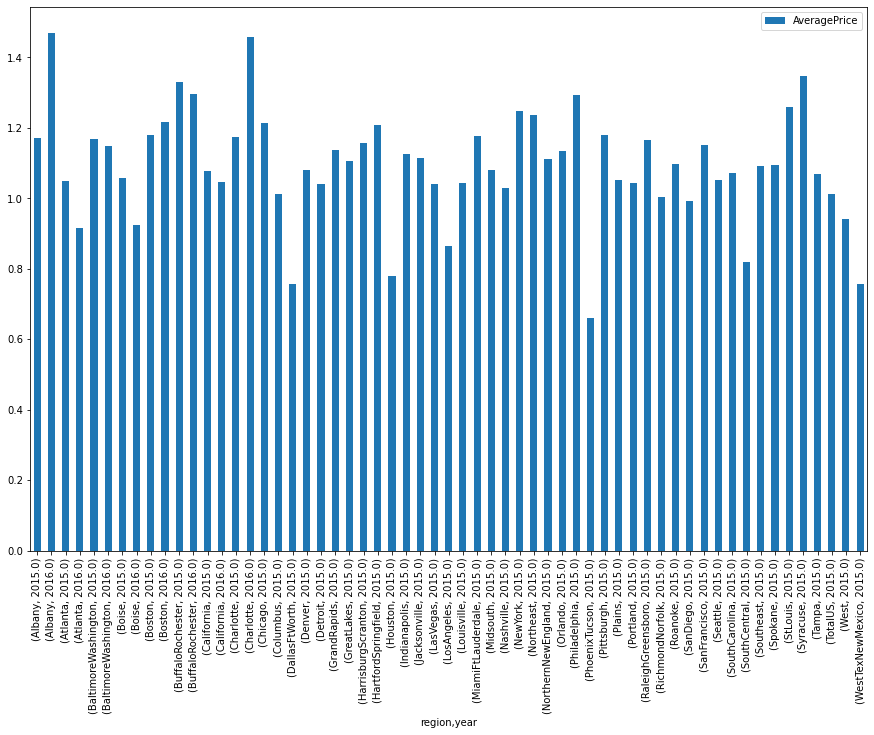

In [97]:
df.groupby(['region','year']).agg({'AveragePrice':np.mean}).plot.bar(figsize=(15, 10))

Over the years Albany has the highest average price, followed by Charlotte. Dallas, PhoneixTucson remains the lowest with Average price

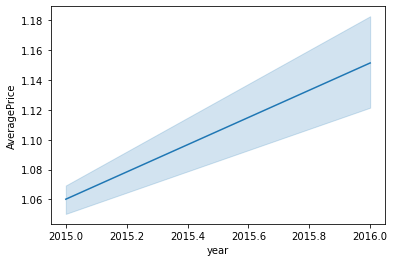

In [98]:
sns.lineplot(x="year", y="AveragePrice", data=df)
plt.show()

We can see that there is increase in average price from 2015

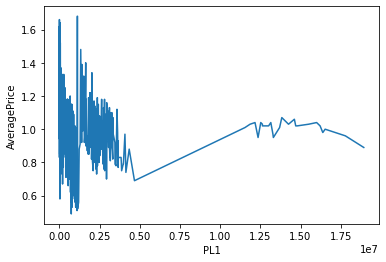

In [99]:
sns.lineplot(x="PL1", y="AveragePrice", data=df)
plt.show()

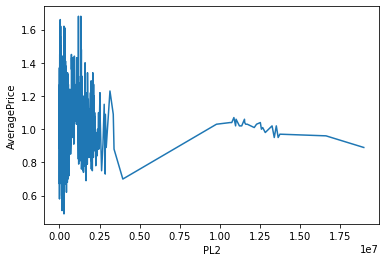

In [100]:
sns.lineplot(x="PL2", y="AveragePrice", data=df)
plt.show()

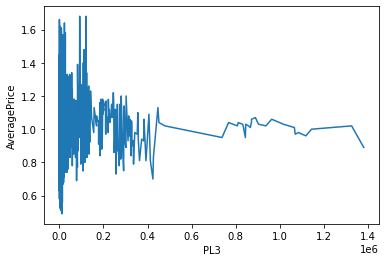

In [101]:
sns.lineplot(x="PL3", y="AveragePrice", data=df)
plt.show()

Above line plots confirm that PL3 price has decrease. We have also observe that volume has increase, hence the decrease in Avg price

<AxesSubplot:>

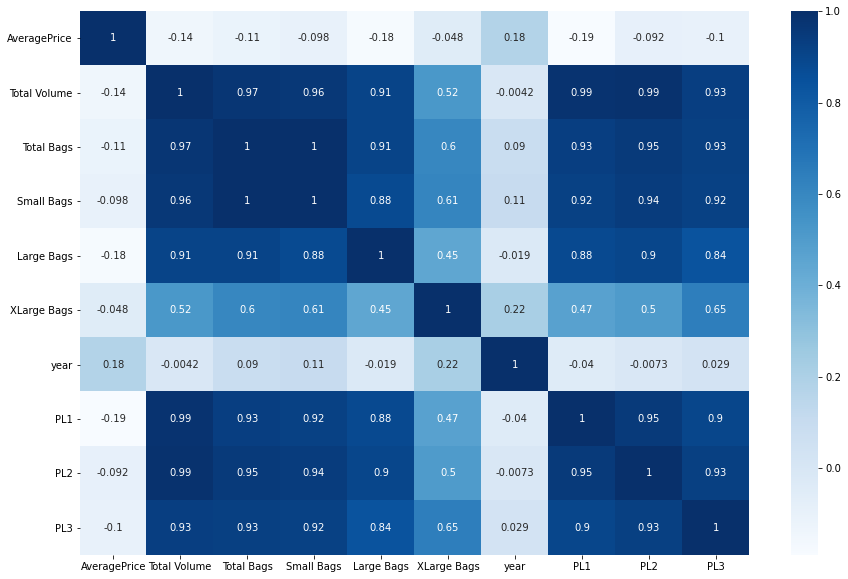

In [102]:
df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

Observation:

1. We can see that Total Volume is highly co related with almost all the features.
2. Total Bags, Small Bags and Large Bags are high corelated among themselves as well as with Total Volume. Infact if we do the    maths Total Volume= TotalBags + PL1+ PL2 + PL3.



Lets create the column for all the numerical features for further visualization.

In [103]:
columns=['AveragePrice','Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags','PL1','PL2','PL3']

In [104]:
df.drop(['type'],axis=1,inplace=True)

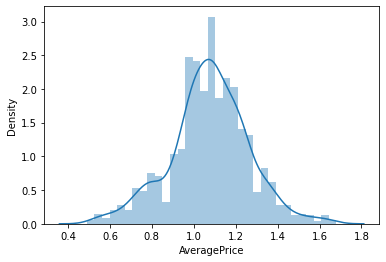

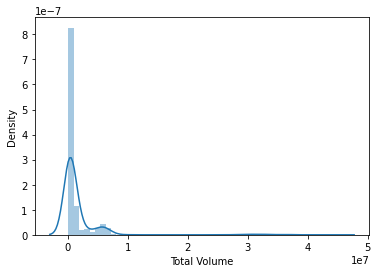

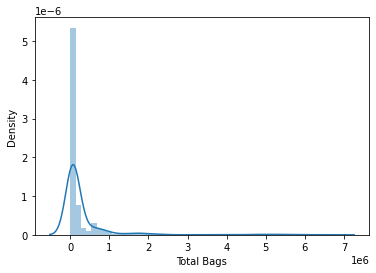

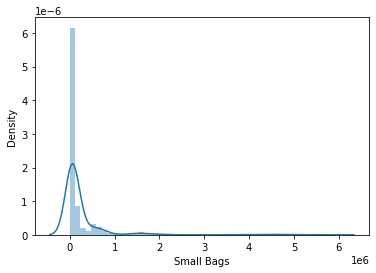

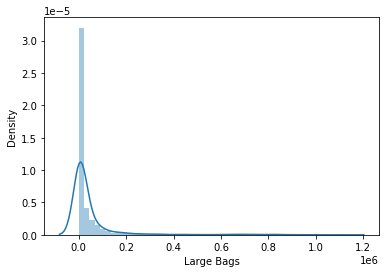

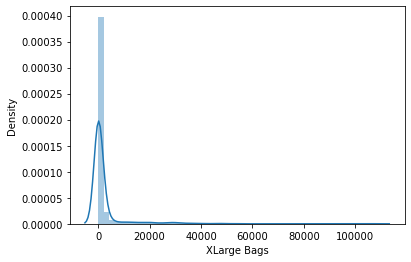

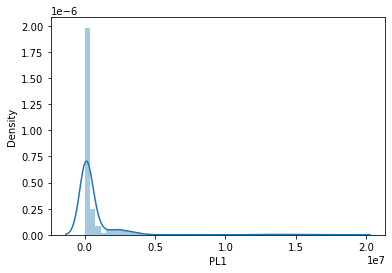

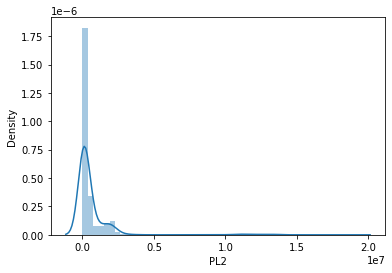

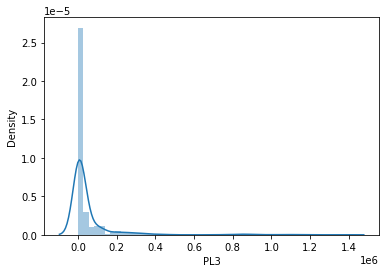

In [105]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

Most of the features are right skewed indicating the presence of outliers.

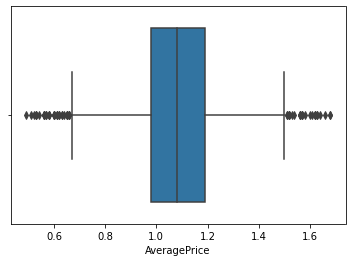

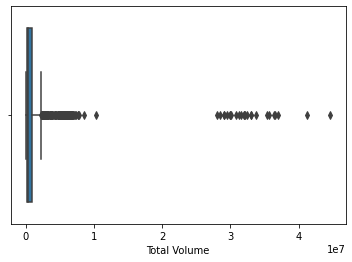

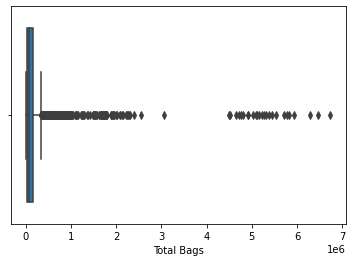

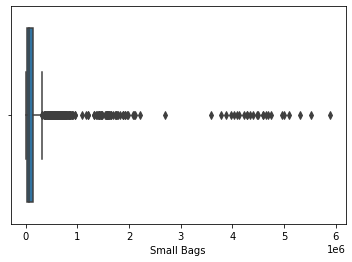

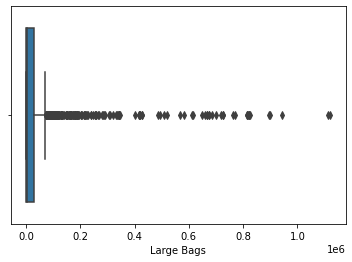

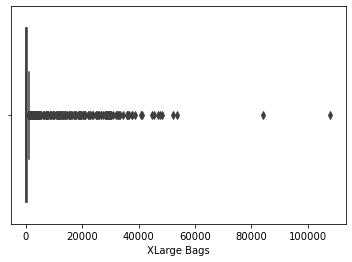

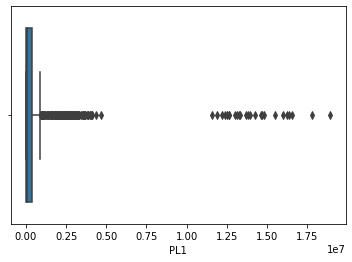

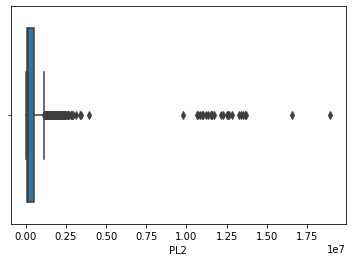

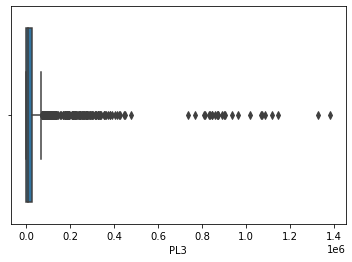

In [106]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

There are many outliers present in the dataset and that needs to be removed.

But before moving further we will change all our categorical data into numnerical using label encoder.

In [107]:
df

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
0,1.33,64236.62,8696.87,8603.62,93.25,0.00,2015.0,Albany,1036.74,54454.85,48.16,DEC
1,1.35,54876.98,9505.56,9408.07,97.49,0.00,2015.0,Albany,674.28,44638.81,58.33,DEC
2,0.93,118220.22,8145.35,8042.21,103.14,0.00,2015.0,Albany,794.70,109149.67,130.50,DEC
3,1.08,78992.15,5811.16,5677.40,133.76,0.00,2015.0,Albany,1132.00,71976.41,72.58,JUNE
4,1.28,51039.60,6183.95,5986.26,197.69,0.00,2015.0,Albany,941.48,43838.39,75.78,NOV
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,59418.46,48823.53,10354.65,240.28,2016.0,Charlotte,57529.11,56366.66,17531.78,OCT
1513,1.51,178235.75,63300.70,54704.14,8596.56,0.00,2016.0,Charlotte,43325.87,52189.61,19419.57,SEPT
1514,1.48,178410.82,62415.77,53332.61,8258.16,825.00,2016.0,Charlotte,46364.75,52893.38,16736.92,FEB
1515,1.47,189131.52,63931.73,55653.47,8278.26,0.00,2016.0,Charlotte,54110.79,53593.58,17495.42,SEPT


We will have to convert the categorical feature into numerical using Label encoder.

In [108]:
columns_cat=['year','Month','region']

In [109]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [110]:
for i in range(len(columns_cat)):
    df[columns_cat[i]]=le.fit_transform(df[columns_cat[i]])

In [111]:
df

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
0,1.33,64236.62,8696.87,8603.62,93.25,0.00,0,0,1036.74,54454.85,48.16,2
1,1.35,54876.98,9505.56,9408.07,97.49,0.00,0,0,674.28,44638.81,58.33,2
2,0.93,118220.22,8145.35,8042.21,103.14,0.00,0,0,794.70,109149.67,130.50,2
3,1.08,78992.15,5811.16,5677.40,133.76,0.00,0,0,1132.00,71976.41,72.58,6
4,1.28,51039.60,6183.95,5986.26,197.69,0.00,0,0,941.48,43838.39,75.78,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,59418.46,48823.53,10354.65,240.28,1,7,57529.11,56366.66,17531.78,10
1513,1.51,178235.75,63300.70,54704.14,8596.56,0.00,1,7,43325.87,52189.61,19419.57,11
1514,1.48,178410.82,62415.77,53332.61,8258.16,825.00,1,7,46364.75,52893.38,16736.92,3
1515,1.47,189131.52,63931.73,55653.47,8278.26,0.00,1,7,54110.79,53593.58,17495.42,11


Done we have change the 3 columns to numerical

Lets treat the outliers using Zscore

Importing the library for Zscore

In [112]:
from scipy.stats import zscore

In [113]:
zscr=np.abs(zscore(df))

threshold=3
print(np.where(zscr>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [114]:
print('shape before removing the outliers:', df.shape)

dfnew=df[(zscr<3).all(axis=1)]

print('shape after removing the outliers:', dfnew.shape)

shape before removing the outliers: (1517, 12)
shape after removing the outliers: (1436, 12)


In [115]:
100-((1517-1436)/1517)*100

94.6605141727093

We are losing around 5.34% data after removing the outliers. That's ok and we will take the newdata frame without the outliers.

In [116]:
df=dfnew

Lets check for skewness

In [117]:
for i in columns:
    if df[i].skew()>0.50:
        df[i]=np.log1p(df[i])

In [136]:
df.skew()

AveragePrice   -0.184770
Total Volume    0.462899
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
year            2.004439
region          0.276276
PL1            -0.270283
PL2             0.011359
PL3            -0.449713
Month          -0.016383
dtype: float64

Others method were checked too for skewness but Log transform worked best

### Model Fitting

Let's split the data into input and target variable

In [119]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']
y=pd.DataFrame(data=y)

Before fitting our model, first we will bring the data to common scale using Standard Scaler

In [120]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x)
sc_x=pd.DataFrame(sc_x,columns=x.columns)

In [121]:
sc_x

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
0,-1.410935,-1.822359,-1.648547,-0.917419,-0.775528,-0.413870,-1.322817,-1.847345,-0.507917,-1.815979,-0.983631
1,-1.535660,-1.746806,-1.573622,-0.904196,-0.775528,-0.413870,-1.322817,-2.042823,-0.635183,-1.739119,-0.983631
2,-0.927830,-1.878029,-1.705109,-0.887434,-0.775528,-0.413870,-1.322817,-1.968169,-0.062698,-1.413794,-0.983631
3,-1.247168,-2.164946,-1.996977,-0.809976,-0.775528,-0.413870,-1.322817,-1.807390,-0.329300,-1.651131,0.202342
4,-1.593074,-2.112115,-1.952576,-0.693305,-0.775528,-0.413870,-1.322817,-1.891150,-0.646768,-1.633730,1.091822
...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.548521,-0.189379,-0.193283,0.494754,0.946229,2.416215,-0.879305,-0.020619,-0.485823,0.586167,1.388316
1432,-0.602663,-0.135593,-0.097945,0.438844,-0.775528,2.416215,-0.879305,-0.149612,-0.535121,0.627966,1.684809
1433,-0.601885,-0.147557,-0.119231,0.426777,1.332463,2.416215,-0.879305,-0.118772,-0.526545,0.567203,-0.687138
1434,-0.555668,-0.127164,-0.083522,0.427507,-0.775528,2.416215,-0.879305,-0.048487,-0.518124,0.585318,1.684809


Our data is now on common scale. I am reassigning x to the sc_x.

In [122]:
x=sc_x
x

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,PL1,PL2,PL3,Month
0,-1.410935,-1.822359,-1.648547,-0.917419,-0.775528,-0.413870,-1.322817,-1.847345,-0.507917,-1.815979,-0.983631
1,-1.535660,-1.746806,-1.573622,-0.904196,-0.775528,-0.413870,-1.322817,-2.042823,-0.635183,-1.739119,-0.983631
2,-0.927830,-1.878029,-1.705109,-0.887434,-0.775528,-0.413870,-1.322817,-1.968169,-0.062698,-1.413794,-0.983631
3,-1.247168,-2.164946,-1.996977,-0.809976,-0.775528,-0.413870,-1.322817,-1.807390,-0.329300,-1.651131,0.202342
4,-1.593074,-2.112115,-1.952576,-0.693305,-0.775528,-0.413870,-1.322817,-1.891150,-0.646768,-1.633730,1.091822
...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.548521,-0.189379,-0.193283,0.494754,0.946229,2.416215,-0.879305,-0.020619,-0.485823,0.586167,1.388316
1432,-0.602663,-0.135593,-0.097945,0.438844,-0.775528,2.416215,-0.879305,-0.149612,-0.535121,0.627966,1.684809
1433,-0.601885,-0.147557,-0.119231,0.426777,1.332463,2.416215,-0.879305,-0.118772,-0.526545,0.567203,-0.687138
1434,-0.555668,-0.127164,-0.083522,0.427507,-0.775528,2.416215,-0.879305,-0.048487,-0.518124,0.585318,1.684809


Let's import the necessary Regression libraries for model fitting.

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

We will use Linear regression model to check for the best random state to fit our training and test data

In [124]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is: 0.3872484197310553
At random state 0,the testing accuracy is: 0.43152696210054553


At random state 1,the training accuracy is: 0.3939612704082164
At random state 1,the testing accuracy is: 0.42075272495834637


At random state 2,the training accuracy is: 0.39621714567255284
At random state 2,the testing accuracy is: 0.4018202218636501


At random state 3,the training accuracy is: 0.40063519032586703
At random state 3,the testing accuracy is: 0.38327017359699056


At random state 4,the training accuracy is: 0.41211052332105114
At random state 4,the testing accuracy is: 0.33642068157421934


At random state 5,the training accuracy is: 0.38012398614215703
At random state 5,the testing accuracy is: 0.4610272430217851


At random state 6,the training accuracy is: 0.4005113073994566
At random state 6,the testing accuracy is: 0.36888008103640846


At random state 7,the training accuracy is: 0.40238323940203913
At random state 7,the testing accuracy

At random state 79,the training accuracy is: 0.3996398911690059
At random state 79,the testing accuracy is: 0.3947971158878001


At random state 80,the training accuracy is: 0.4013616838595707
At random state 80,the testing accuracy is: 0.3830684534329215


At random state 81,the training accuracy is: 0.39573667758119724
At random state 81,the testing accuracy is: 0.3955041948952439


At random state 82,the training accuracy is: 0.39226169098998676
At random state 82,the testing accuracy is: 0.4139144638998161


At random state 83,the training accuracy is: 0.394938779327777
At random state 83,the testing accuracy is: 0.415124325201098


At random state 84,the training accuracy is: 0.40121267716908915
At random state 84,the testing accuracy is: 0.38457878613729146


At random state 85,the training accuracy is: 0.3854545234563308
At random state 85,the testing accuracy is: 0.43230729618856967


At random state 86,the training accuracy is: 0.3953284858749251
At random state 86,the testing

We will now split the data with the random_state 54 as that has given us the best accuracy on training and test data.

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=54)

#### Fitting the data to SupportVectorRegression model

In [126]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.38964454401799264
0.6896750957547344
0.7982917195766309


Kernel 'rbf' has given us the best output, hence we will select 'rbf' for testing the mod

#### Fitting the data to various model and checking the accuracy

In [127]:
sv=SVR(kernel='rbf')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()

model=[lr,sv,dt,rf,kn,ab]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean())
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,0.392694,0.421713,0.021319,0.385688
1,SupportVector,0.798292,0.765529,0.008644,0.730193
2,DecisionTree,1.000000,0.655070,0.012716,0.681178
3,RandomForest,0.974739,0.856105,0.005305,0.824487
4,KNN,0.821209,0.765673,0.008639,0.711889
5,AdaBoost,0.644565,0.640822,0.013242,0.608893


##### We can say that Random Forest Regressor has performed well with test score of 85% and CV score of 82%. SV has also performed well with 76% test accuracy and CV score of 73%


##### Normalization and HyperTuning

Importing the required libraries for normalizing the coefficients and Hypertuning our model

Using Lasso for Normalization

Lets check the best parameters for Lasso

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


Lets fit the above parameters to the Lasso

In [129]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.42127201588679586

Checking cross validation score for Lasso

In [130]:
cv_score=cross_val_score(ls,x,y,cv=kf)
cv_mean=cv_score.mean()
cv_mean

0.3857379099698203

#### We will select RandomForest and Support Vector as our model and Hypertune it to se if there is increase in any accuracy

In [131]:
from sklearn.model_selection import GridSearchCV

Importing the library GridSearch for Hypertuning

Updating parameters for RFR

In [132]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50]}

In [133]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

We got the best parameters for our Random Forest model. We will fit it to re train our model

In [135]:
Finalmod=RandomForestRegressor(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=2,n_estimators=50)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=r2_score(y_test,pred)
MSE = mean_squared_error(y_test,pred_test)
cvs_score=cross_val_score(Finalmod,x,y,cv=kf)

print('Accuracy Score of RandomForest is',acc*100)
print('Mean Square Error is',MSE)
print('Cross Vaidation Score is', cvs_score.mean()*100)

Accuracy Score of RandomForest is 85.8477442921108
Mean Square Error is 0.01324157508957637
Cross Vaidation Score is 83.19820289701705


##### There is a slight incrase in the model performance with Accuracy score of 85% and CV score of 83%

We will now select SVR model for Hypertuning

In [139]:
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

In [140]:
GCV=GridSearchCV(SVR(),param,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'C': 5, 'coef0': 0.01, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

In [142]:
Finalmod1=SVR(C= 5, coef0= 0.01, degree=3, gamma='scale',kernel='rbf')
Finalmod1.fit(x_train,y_train)
pred=Finalmod1.predict(x_test)
acc1=r2_score(y_test,pred)
MSE1 = mean_squared_error(y_test,pred_test)
cvs_score1=cross_val_score(Finalmod1,x,y,cv=kf)

print('Accuracy Score of RandomForest is',acc1*100)
print('Mean Square Error is',MSE1)
print('Cross Vaidation Score is', cvs_score1.mean()*100)

Accuracy Score of RandomForest is 79.9980678117176
Mean Square Error is 0.01324157508957637
Cross Vaidation Score is 75.88324189798729


##### SVR has imrpove sigificantly from test performance however RandomForest is giving better result. Hence we will select RandomForest as the final model

#### Lets Visualize our model

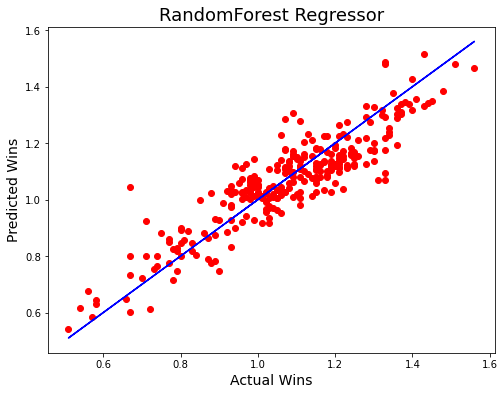

In [143]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('RandomForest Regressor',fontsize=18)
plt.show()

The model is performing iwth 84% accuracy. Hence we can say that we can predict 84% of the Avocado prices correctly.


Lets create our object file for the final model

In [145]:
import joblib
joblib.dump(Finalmod,'Avocado_price.obj')

['Avocado_price.obj']

##### Completed